In [3]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake

2025-06-04 05:59:47.465300: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-06-04 05:59:47.466181: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 05:59:47.478681: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-04 05:59:47.554293: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-04 05:59:48.452381: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

In [4]:
# drichlet_ids = [1,2,5,6,7,8,9,10,11] #dotson-crosson.geojson
# drichlet_ids = [1,2,3,4,5,6,7,9,10,11,12,13,14,15] #dotson-crosson-v1.geojson
drichlet_ids = [1,3,5,6,7,8,9,10,11]
side_ids = []
invert_amundsen = Invert(outline = 'data/geojson/amundsen_v1.geojson', mesh_name = 'amundsen',reg_constant_c  = 0.05, read_mesh = False,opts = None, drichlet_ids = drichlet_ids , lcar = 9e3)

Reading local outline
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='meters'>)

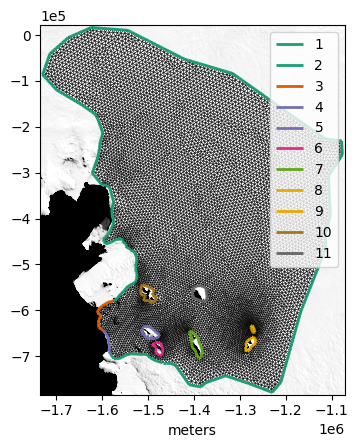

In [5]:
invert_amundsen.plot_mesh()

In [6]:
invert_amundsen.import_velocity_data(constant_val=0.01)

Reading velocity from measures database
C0 is constant: 0.01
Defining friction law


In [7]:
invert_amundsen.import_geophysics_data(name_list=['data/geophysics/ADMAP_MagneticAnomaly_5km.tif', 
                                                'data/geophysics/ANTGG_BouguerAnomaly_10km.tif', 
                                                'data/geophysics/GeothermalHeatFlux_5km.tif',
                                                'data/geophysics/ALBMAP_SurfaceAirTemperature_5km.tif',
                                                'data/geophysics/EIGEN-6C4_GravityDisturbance_10km.tif',
                                                'data/geophysics/ALBMAP_SnowAccumulation_Arthern_5km.tif',
                                                'data/geophysics/Englacial_temp_Pattyn_2013.tif',])

Defining friction law
using englacial temperature for rate factor
Geophysics data imported


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Englacial Temperature'}, xlabel='meters'>)

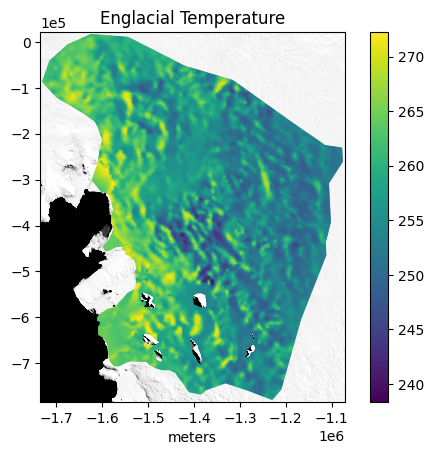

In [8]:
invert_amundsen.plot_englacial_temp()

In [9]:
invert_amundsen.invert_C(max_iterations=3, regularization_grad_fcn= True, loss_fcn_type = 'nosigma')

Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     2.634803e+08   9.215758e+03                  2.394417e+04   
  1     1.257310e+08   3.610559e+03   2.394417e+04   5.986044e+04   3         2         0         1         3         


KeyboardInterrupt: 

In [ ]:
u_optimized =  invert_amundsen.simulation()

In [ ]:
firedrake.assemble(invert_amundsen.loss_functional_nosigma(u_optimized))

1248.372044290589

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Error in U'}, xlabel='meters'>)

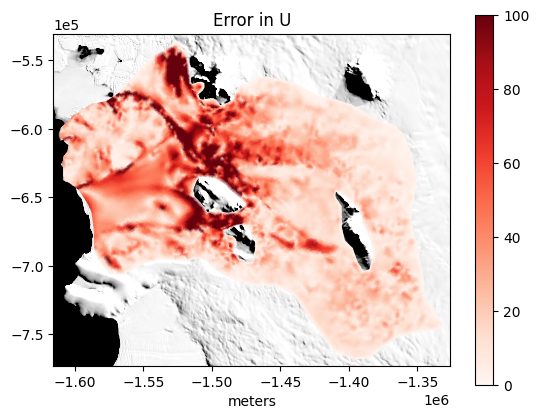

In [ ]:
invert_amundsen.plot_u_error_no_sigma(u_optimized, vmax = 100)

In [10]:
invert_amundsen.plot_u_error_percentage(u_optimized, vmax = 10)

NameError: name 'u_optimized' is not defined

In [ ]:
C_optimized = invert_amundsen.get_C()

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$||V||$'}, xlabel='meters'>)

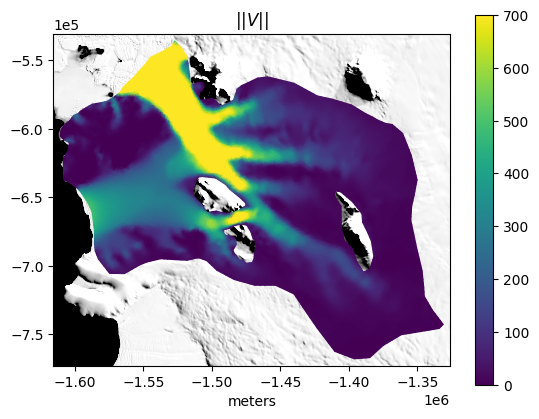

In [ ]:
invert_amundsen.plot_u_mag(u_optimized, vmax=700)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'C'}, xlabel='meters'>)

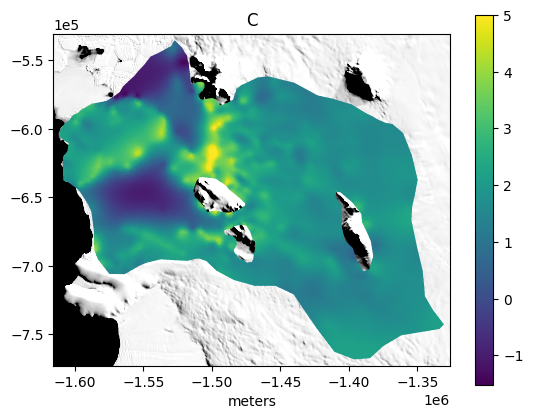

In [ ]:
invert_amundsen.plot_C(vmax = 5)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$C_{b}$'}, xlabel='meters'>)

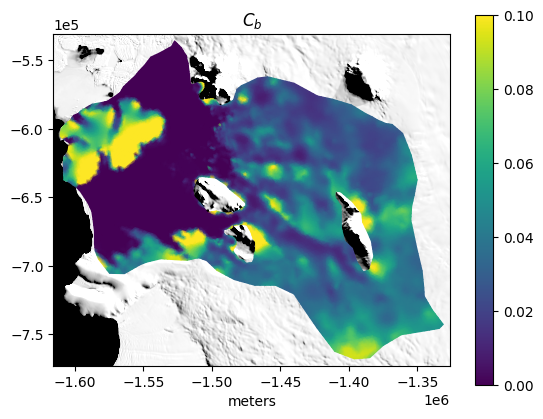

In [ ]:
invert_amundsen.plot_C_total(vmax = 0.1)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Grounding Line'}, xlabel='meters'>)

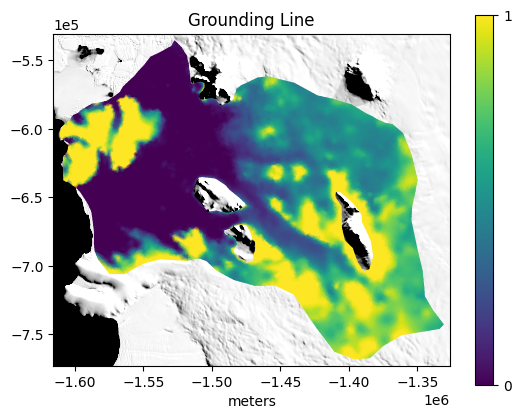

In [ ]:
invert_amundsen.plot_grounding_line()

In [ ]:
#invert_dotson.inverse_u = invert_dotson.u_initial
invert_amundsen.inverse_u = u_optimized

In [ ]:
#theta = invert_dotson.θ
C = invert_amundsen.C

In [ ]:
df = invert_amundsen.get_dataframe(u_optimized)
df.to_csv('regularized_const_01C_C_only_englacial_temp_amundsen_r005_geo_12.csv')